In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import gaussian_filter, percentile_filter

In [2]:
pixels = 128

In [17]:
pixelcounterlogic.trigger_pixel_counter(pixels=pixels)

0

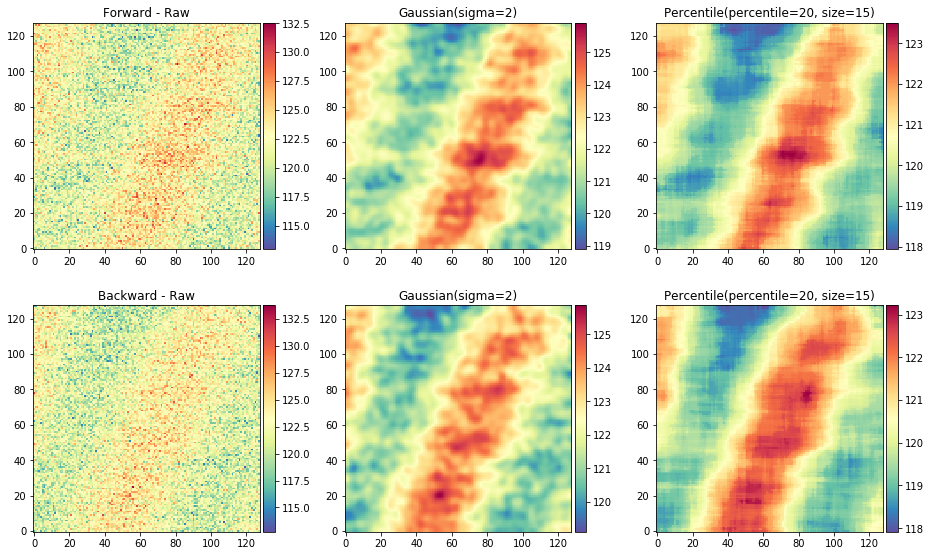

In [30]:
# Gaussian Filter
sigma = 2

# Percentile Filter
percentile = 20
size = 15

scan_direction = "up"

cmap = "Spectral_r"

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(13, 8))

for idx, scan in enumerate(pixelcounterlogic.update_counts()):
    scan /= 1e3
    title = "Forward" if idx == 0 else "Backward"
    origin = "lower" if scan_direction == "up" else "upper"
    
    cax0 = make_axes_locatable(axes[idx, 0]).append_axes('right', size='5%', pad=0.05)
    img = axes[idx, 0].imshow(scan, origin=origin, cmap=cmap)
    axes[idx, 0].set_title(f"{title} - Raw")
    fig.colorbar(img, cax=cax0)

    cax1 = make_axes_locatable(axes[idx, 1]).append_axes('right', size='5%', pad=0.05)
    img_gaussian = axes[idx, 1].imshow(gaussian_filter(scan, sigma=sigma), origin=origin, cmap=cmap)
    axes[idx, 1].set_title(f"Gaussian(sigma={sigma})")
    fig.colorbar(img_gaussian, cax=cax1)

    cax2 = make_axes_locatable(axes[idx, 2]).append_axes('right', size='5%', pad=0.05)
    img_percentile = axes[idx, 2].imshow(percentile_filter(scan, percentile=percentile, size=size), origin=origin, cmap=cmap)
    axes[idx, 2].set_title(f"Percentile(percentile={percentile}, size={size})")
    fig.colorbar(img_percentile, cax=cax2)

fig.tight_layout()
plt.show()

In [31]:
pixelcounterlogic.save_data(fig, tag="scan58_z_1600nm")